In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
train_df = pd.read_csv("/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/british/train_cohort_bmi.csv.gz")

In [3]:
test_df = pd.read_csv("/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/british/test_cohort_bmi.csv.gz")

In [4]:
len(train_df), len(test_df), len(train_df) + len(test_df)

(427639, 56630, 484269)

<AxesSubplot: xlabel='bmi_prs', ylabel='Count'>

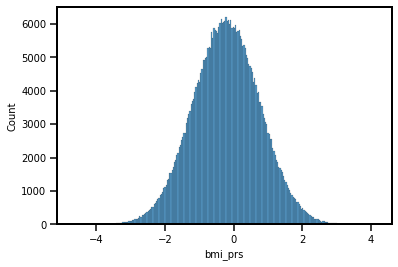

In [6]:
sns.histplot(data=train_df, x="bmi_prs")

<Axes: xlabel='bmi_residuals', ylabel='Count'>

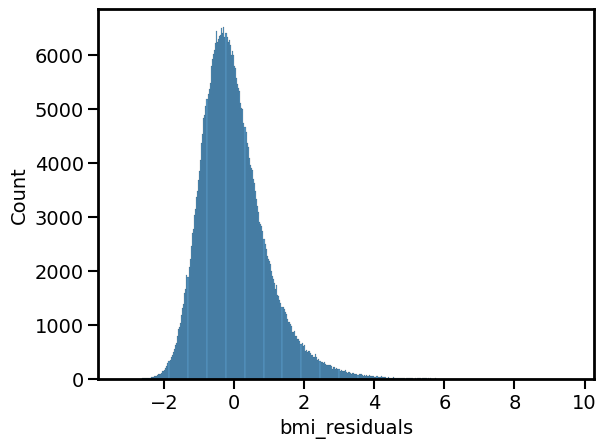

In [17]:
sns.histplot(data=df, x="bmi_residuals")

In [19]:
df

,sample_names,sex,genetic_kinship_to_other_participants,genetic_ethnic_grouping,genetic_sex,year_of_birth,bmi_prs,genetic_pca1,genetic_pca2,genetic_pca3,...,genetic_pca38,genetic_pca39,genetic_pca40,menopause,ethnic_background,bmi,age,bmi_scaled,bmi_residuals,bmi_deciles
0,1000028,Male,No kinship found,Caucasian,1,1947.0,-0.452521,-1.049343,-0.035594,-0.318610,...,-1.301051,-2.121493,-0.528176,NaN,British,25.50385,1.053334,-0.400313,-0.408359,3
1,1000045,Female,At least one relative identified,Caucasian,0,1952.0,-0.894587,-0.375479,-0.102603,-0.511934,...,0.116458,0.172739,-2.491580,Yes,British,23.71090,-0.190425,-0.777059,-0.462484,3
2,1000171,Female,No kinship found,Caucasian,0,1944.0,-0.788252,-0.382776,-0.734280,0.182330,...,-1.801504,-0.090783,-0.755636,Yes,British,30.92310,1.426462,0.738413,0.985810,8
3,1000196,Female,No kinship found,NaN,0,1959.0,0.248674,9.739123,-21.189125,-11.847223,...,0.756860,-1.405768,0.201243,inconsistent,British,19.57480,-0.563553,-1.646162,-1.554883,0
4,1000222,Male,No kinship found,Caucasian,1,1940.0,0.309868,0.531430,0.476652,-0.542410,...,0.699100,0.215883,3.912200,NaN,British,30.00600,1.302086,0.545706,0.292562,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427634,6024948,Male,No kinship found,Caucasian,1,1953.0,0.543946,0.166423,0.526967,-0.109158,...,0.109191,0.542504,-4.138590,NaN,British,47.22080,-0.314801,4.162986,3.942332,9
427635,6025016,Male,No kinship found,Caucasian,1,1942.0,-0.974780,0.985217,-0.361463,0.462544,...,0.097005,0.024763,-0.583682,NaN,British,26.56900,1.053334,-0.176497,-0.024413,5
427636,6025119,Male,At least one relative identified,Caucasian,1,1957.0,1.205798,0.028790,-0.315907,-0.332173,...,0.547546,-1.157715,1.978230,NaN,British,30.07590,-0.252613,0.560394,0.120928,6
427637,6025181,Male,No kinship found,Caucasian,1,1964.0,0.092660,0.053980,-0.853161,-0.321771,...,0.705838,-0.349592,5.136710,NaN,British,26.49910,-1.558560,-0.191185,-0.211799,4
